In [1]:
import ijson
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np
import os, sys, stat, time
import subprocess
import re
import csv

fileType1= 't1.json'
fileType2= 't2.json'
fileType3= 't3.json'
#HOME='/home/anil-mint-desktop/project/patchstudy/plots/ds'
#LINUX='/home/anil-mint-desktop/linux-stable'

HOME='/Users/anilkoyuncu/patchstudy/scripts'
LINUX='/Users/anilkoyuncu/linux-stable'

revertFile = 'revert.json'

def readFile(filename):
    with open(filename, 'r') as f:
        content = f.readlines()
    return content
def prepareFile(content):
    shas = list()
    #fs = list()
    for i in content:
        s= i.split(' ')
        sha = s[0]
        shas.append(sha)
            
    return shas

def controlReverts(sha):

    cmd ='git show '+sha+' |grep -E -i \"revert *.*[0-9a-f]{5}+|commit *.*[0-9a-f]{5}+|[0-9a-f]{40}$*" '
   

    tmp = os.popen(cmd).readlines()

    res = list()
    for l in tmp:
        if l.find(sha) == -1:
            res.append(l)
    return res
        

def saveDict2File(aDict, filename):
    w = csv.writer(open(filename, "w"))
    for key, val in aDict.items():
        w.writerow([key, val])  


def getRevertFromGit():
    os.chdir(LINUX)
    c = readFile(revertFile)
    shas = prepareFile(c)
    aDict = dict()

    for sha in shas:
        res= controlReverts(sha)
        aDict[sha] = res
        
    #saveDict2File(aDict,'aDict.csv')
    return aDict

def searchSha1s(aDict):
    pattern = re.compile(r'\b[0-9a-f]{5,40}\b')

    exactShaDict = dict()
    shortShaDict = dict()
    for k,v in aDict.iteritems():
        for i in v:
            match = (re.search(pattern,i))
            if match:
                if match.group(0) != 'added':
                    if len(match.group(0)) == 40:
                        if exactShaDict.has_key(k):
                            exactShaDict[k].append(match.group(0))
                        else:
                            l = list()
                            l.append(match.group(0))
                            exactShaDict[k] = l
                    else:
                        if shortShaDict.has_key(k):
                            shortShaDict[k].append(match.group(0))
                        else:
                            l = list()
                            l.append(match.group(0))
                            shortShaDict[k] = l

    #print(elDict)

    #saveDict2File(exactShaDict,'exactShaDict.csv')
    #saveDict2File(shortShaDict,'shortShaDict.csv') 
    return exactShaDict,shortShaDict

def revParse(sha):
    #os.chdir(LINUX)
    #fn = fn.replace('[','').replace(']','')
    #sha = 'f6454b049d81bb3d732b6a8afde08420589c6af9'
    cmd ='git rev-parse '+sha
   

    tmp = os.popen(cmd).read()
    res = tmp.split('\n')
    #proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)
    #tmp = proc.stdout.read()
    #print(tmp[5])
    #print(tmp)
    return res[0]   
def short2Sha(shortShaDict):
    shaDict = dict()
    dead = dict()
    for k,v in shortShaDict.iteritems():
        for i in v:
            rev = revParse(i)        
            if len(rev) == 40:
                if shaDict.has_key(k):
                    shaDict[k].append(rev)
                else:
                    l = list()
                    l.append(rev)
                    shaDict[k] = l
            else:
                if dead.has_key(k):
                    dead[k].append(rev)
                else:
                    l = list()
                    l.append(rev)
                    dead[k] = l 

    #print(ell)
    #saveDict2File(shaDict,'shaDict.csv')
    return shaDict
def mergeShas(shaDict,exactShaDict):
    allDict = dict()
    for k,v in shaDict.iteritems():
        if allDict.has_key(k):
            allDict[k].append(v)
        else:
            allDict[k] = v
    for k,v in exactShaDict.iteritems():
        if allDict.has_key(k):
            allDict[k].append(v)
        else:
            allDict[k] = v

    #saveDict2File(allDict,'allDict.csv')
    l = list()
    for i in allDict.values():
        l += i
    return l

#HOME='/home/anil-mint-desktop/patchstudy/test/datasets/ds'

def datasetReader(filename):
    with open(filename, 'r') as f:
        objects = ijson.items(f,'item' )
        rows = list(objects)
    #print(rows[0])
    return rows

def prepareDataFrame(ds ):
    commits = pd.DataFrame.from_dict(ds)
    df = commits["commit"].values
    return df

if __name__ == '__main__':  
    
    os.chdir(HOME)
    ds1 = datasetReader(fileType1)
    df1 = prepareDataFrame(ds1)
    print(len(df1))
    ds2 = datasetReader(fileType2)
    df2 = prepareDataFrame(ds2)
    print(len(df2))
    ds3 = datasetReader(fileType3)
    df3 = prepareDataFrame(ds3)
    print(len(df3))
    
    rev1 = list()
    rev2 = list()
    rev3 = list()
    
    '''aDict = getRevertFromGit()
    exactShaDict,shortShaDict = searchSha1s(aDict)
    shaDict = short2Sha(shortShaDict)
    l= mergeShas(shaDict,exactShaDict)'''
    
    for i in df1:
        #if i in l:
        rev1.append(i)
    for i in df2:
        #if i in l:
        rev2.append(i)
    for i in df3:
        #if i in l:
        rev3.append(i)
            
    
    

    

4050
729
5758
4050
729
5758


In [2]:
dfAll = np.concatenate((df1, df2, df3), axis=0)

c1 = pd.DataFrame.from_dict(ds1)
c2 = pd.DataFrame.from_dict(ds2)
c3 = pd.DataFrame.from_dict(ds3)
revertFile = 'revert.json'
os.chdir(LINUX)
ds4 = datasetReader(revertFile)
reverts = pd.DataFrame.from_dict(ds4)


def controlReverts(sha):
    #print sha

    cmd ='git show '+sha+' #|grep -E -i \"revert *.*[0-9a-f]{5}+|commit *.*[0-9a-f]{5}+|[0-9a-f]{40}$*" '
   

    tmp = os.popen(cmd).readlines()
    
    #print tmp

    res = list()
    startBody = False
    for l in tmp:
        #re.search(r'PATCH',x,re.IGNORECASE)
        startPattern = 'Date:'
        endPattern  = '^diff --git'
        isStart = re.search(startPattern,l)
        
        if isStart:
            startBody = True
            continue
        isEnd = re.search(endPattern,l)
        
        if isEnd:
            break
        if startBody:
            
            match = re.search('revert[a-z]*', l,re.IGNORECASE)
            if match:

                commit = re.search('commit[a-z]* [0-9a-f]{5,40}', l,re.IGNORECASE)
                if commit:
                    sha = re.search('[0-9a-f]{5,40}', l,re.IGNORECASE)
                    if sha:
                        res.append(sha.group(0))

            else:
                shortCommit = re.search('commit[a-z]* [0-9a-f]{5,40}', l,re.IGNORECASE)
                if shortCommit:
                    sha = re.search('[0-9a-f]{5,40}', l,re.IGNORECASE)
                    if sha:
                        res.append(sha.group(0))
    return res
            


In [6]:
reverts['reverts'] = reverts.commit.apply(controlReverts)

In [9]:
nonEmptyReverts = reverts[reverts.reverts.str.len() > 0]

In [10]:
def revParse(shas):
    parsedShas = list()
    for sha in shas:

        cmd ='git rev-parse '+sha


        tmp = os.popen(cmd).readlines()
        #res = tmp.split('\n')
        for l in tmp:
            print l
        if len(tmp) == 1:
            res = tmp[0].split('\n')
            parsedShas.append( res[0] )
            print res[0]
    return parsedShas

In [11]:
nonEmptyReverts['shas'] = nonEmptyReverts.reverts.apply(revParse)

6b7e95d1336b9eb0d4c6db190ce756480496bd13

6b7e95d1336b9eb0d4c6db190ce756480496bd13
16200948d8353fe29a473a394d7d26790deae0e7

16200948d8353fe29a473a394d7d26790deae0e7
015618b902ae8e28705b7af9b4668615fea48ddd

015618b902ae8e28705b7af9b4668615fea48ddd
e9ba389c5ffc4dd29dfe17e00e48877302111135

e9ba389c5ffc4dd29dfe17e00e48877302111135
ccc1696d527d64deb417bfa1ef9e479d10ad4f6b

ccc1696d527d64deb417bfa1ef9e479d10ad4f6b
f1bddbb3de60872acc2446eee97dbeb0a6d57acb

f1bddbb3de60872acc2446eee97dbeb0a6d57acb
855ed04a3758b205e84b269f92d26ab36ed8e2f7

855ed04a3758b205e84b269f92d26ab36ed8e2f7
7f503169cabd70c1f13b9279c50eca7dfb9a7d51

7f503169cabd70c1f13b9279c50eca7dfb9a7d51
9c7262399ba12825f3ca4b00a76d8d5e77c720f5

9c7262399ba12825f3ca4b00a76d8d5e77c720f5
73b62bd085f4737679ea9afc7867fa5f99ba7d1b

73b62bd085f4737679ea9afc7867fa5f99ba7d1b
f23bc46c30ca5ef58b8549434899fcbac41b2cfc

f23bc46c30ca5ef58b8549434899fcbac41b2cfc
16200948d8353fe29a473a394d7d26790deae0e7

16200948d8353fe29a473a394d7d26790deae0e7
2ee7

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
nonEmptyReverts['types'] = nonEmptyReverts.shas.apply(controlTypes)

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
shaList = list()
for i in (nonEmptyReverts.shas.values.tolist()):
    
    for j in i:
        shaList.append(j)

def isReverted(sha):
    if sha in shaList:
        return True
    else:
        return False
    

In [16]:
c1['isReverted'] = c1.commit.apply(isReverted)
c2['isReverted'] = c2.commit.apply(isReverted)
c3['isReverted'] = c3.commit.apply(isReverted)

In [17]:
c1Reverted = c1[c1.isReverted == True]
c2Reverted = c2[c2.isReverted == True]
c3Reverted = c3[c3.isReverted == True]

In [18]:
allRevertedCommits =c1Reverted.commit.values.tolist() + c2Reverted.commit.values.tolist() + c3Reverted.commit.values.tolist()

In [19]:
def isReverting(shas):
    for sha in shas:
        if sha in allRevertedCommits:
            return True

In [20]:
revertingCommits = nonEmptyReverts[nonEmptyReverts.shas.apply(isReverting) == True]

In [21]:
def targetCommit(shas):
    for sha in shas:
        if sha in allRevertedCommits:
            return sha

In [22]:
revertingCommits['targetCommit'] = revertingCommits.shas.apply(targetCommit)

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
revertingCommits

,authorDate,commit,reverts,shas,types,targetCommit
1,1483569466,1d0f953086f090a022f2c0e1448300c15372db46,"[16200948d83, 015618b90, e9ba389c5, ccc1696d5]","[16200948d8353fe29a473a394d7d26790deae0e7, 015...","[, , [e9ba389c5ffc4dd29dfe17e00e48877302111135]]",e9ba389c5ffc4dd29dfe17e00e48877302111135
56,1479295796,8e1b56a4b1deb3d25674c49255388902901f2c45,[3143751ff51a163b77f7efd389043e038f3e008e],[3143751ff51a163b77f7efd389043e038f3e008e],"[, , [3143751ff51a163b77f7efd389043e038f3e008e]]",3143751ff51a163b77f7efd389043e038f3e008e
147,1474881644,26aa23396ed34343ba55cae985160856246dafbb,"[10b6ee4a87811a110cb01eaca01eb04da6801baf, e4a...","[10b6ee4a87811a110cb01eaca01eb04da6801baf, e4a...","[, , [10b6ee4a87811a110cb01eaca01eb04da6801baf]]",10b6ee4a87811a110cb01eaca01eb04da6801baf
171,1474393851,52dc085a50c6b4b8143087ce194d0b193cb3662d,[3ccc60f9d8c39180c205dba1a020735bda1b2491],[3ccc60f9d8c39180c205dba1a020735bda1b2491],"[, , [3ccc60f9d8c39180c205dba1a020735bda1b2491]]",3ccc60f9d8c39180c205dba1a020735bda1b2491
199,1473758539,ea54ff4008892b46c7a3e6bc8ab8aaec9d198639,"[a05628195a0d, aeddda06c1a7, c8ebfad7a063fe665...","[a05628195a0d9f3173dd9aa76f482aef692e46ee, aed...","[, , [a05628195a0d9f3173dd9aa76f482aef692e46ee]]",a05628195a0d9f3173dd9aa76f482aef692e46ee
201,1473758539,c8ebfad7a063fe665417fa0eeb0da7cfe987d8ed,"[a05628195a0d, aeddda06c1a7]","[a05628195a0d9f3173dd9aa76f482aef692e46ee, aed...","[, , [a05628195a0d9f3173dd9aa76f482aef692e46ee]]",a05628195a0d9f3173dd9aa76f482aef692e46ee
276,1467799545,196f954e250943df414efd3d632254c29be38e59,[013dd9e03872],[013dd9e038723bbd2aa67be51847384b75be8253],"[, , [013dd9e038723bbd2aa67be51847384b75be8253]]",013dd9e038723bbd2aa67be51847384b75be8253
277,1467799544,e10aec652f31ec61d6a0b4d00d8ef8d2b66fa0fd,[013dd9e03872],[013dd9e038723bbd2aa67be51847384b75be8253],"[, , [013dd9e038723bbd2aa67be51847384b75be8253]]",013dd9e038723bbd2aa67be51847384b75be8253
283,1470293567,df0e9a287da83f3fd17b47d5f0682f48c722aee7,[e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae],[e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae],"[, , [e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae]]",e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae
330,1468246868,00c611def8748a0a1cf1d31842e49b42dfdb3de1,[3d4b7ae96d81],[3d4b7ae96d81dc8ed4ecd556118b632c2707ff08],"[, , [3d4b7ae96d81dc8ed4ecd556118b632c2707ff08]]",3d4b7ae96d81dc8ed4ecd556118b632c2707ff08


In [24]:
def getTargetCommitAuthorDate(sha):
    c = [c1,c2,c3]
    for i in c:
        aC = i[i.commit == sha]
        if(len(aC) > 0):
            #print len(aC)
            return aC.authorDate.values.tolist()[0]

In [25]:
revertingCommits['targetAuthorDate']= revertingCommits.targetCommit.apply(getTargetCommitAuthorDate)

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
revertingCommits

,authorDate,commit,reverts,shas,types,targetCommit,targetAuthorDate
1,1483569466,1d0f953086f090a022f2c0e1448300c15372db46,"[16200948d83, 015618b90, e9ba389c5, ccc1696d5]","[16200948d8353fe29a473a394d7d26790deae0e7, 015...","[, , [e9ba389c5ffc4dd29dfe17e00e48877302111135]]",e9ba389c5ffc4dd29dfe17e00e48877302111135,1345026720
56,1479295796,8e1b56a4b1deb3d25674c49255388902901f2c45,[3143751ff51a163b77f7efd389043e038f3e008e],[3143751ff51a163b77f7efd389043e038f3e008e],"[, , [3143751ff51a163b77f7efd389043e038f3e008e]]",3143751ff51a163b77f7efd389043e038f3e008e,1269846736
147,1474881644,26aa23396ed34343ba55cae985160856246dafbb,"[10b6ee4a87811a110cb01eaca01eb04da6801baf, e4a...","[10b6ee4a87811a110cb01eaca01eb04da6801baf, e4a...","[, , [10b6ee4a87811a110cb01eaca01eb04da6801baf]]",10b6ee4a87811a110cb01eaca01eb04da6801baf,1396548835
171,1474393851,52dc085a50c6b4b8143087ce194d0b193cb3662d,[3ccc60f9d8c39180c205dba1a020735bda1b2491],[3ccc60f9d8c39180c205dba1a020735bda1b2491],"[, , [3ccc60f9d8c39180c205dba1a020735bda1b2491]]",3ccc60f9d8c39180c205dba1a020735bda1b2491,1350646126
199,1473758539,ea54ff4008892b46c7a3e6bc8ab8aaec9d198639,"[a05628195a0d, aeddda06c1a7, c8ebfad7a063fe665...","[a05628195a0d9f3173dd9aa76f482aef692e46ee, aed...","[, , [a05628195a0d9f3173dd9aa76f482aef692e46ee]]",a05628195a0d9f3173dd9aa76f482aef692e46ee,1460359431
201,1473758539,c8ebfad7a063fe665417fa0eeb0da7cfe987d8ed,"[a05628195a0d, aeddda06c1a7]","[a05628195a0d9f3173dd9aa76f482aef692e46ee, aed...","[, , [a05628195a0d9f3173dd9aa76f482aef692e46ee]]",a05628195a0d9f3173dd9aa76f482aef692e46ee,1460359431
276,1467799545,196f954e250943df414efd3d632254c29be38e59,[013dd9e03872],[013dd9e038723bbd2aa67be51847384b75be8253],"[, , [013dd9e038723bbd2aa67be51847384b75be8253]]",013dd9e038723bbd2aa67be51847384b75be8253,1452695720
277,1467799544,e10aec652f31ec61d6a0b4d00d8ef8d2b66fa0fd,[013dd9e03872],[013dd9e038723bbd2aa67be51847384b75be8253],"[, , [013dd9e038723bbd2aa67be51847384b75be8253]]",013dd9e038723bbd2aa67be51847384b75be8253,1452695720
283,1470293567,df0e9a287da83f3fd17b47d5f0682f48c722aee7,[e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae],[e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae],"[, , [e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae]]",e9f24d5fb7cf3628b195b18ff3ac4e37937ceeae,1444047996
330,1468246868,00c611def8748a0a1cf1d31842e49b42dfdb3de1,[3d4b7ae96d81],[3d4b7ae96d81dc8ed4ecd556118b632c2707ff08],"[, , [3d4b7ae96d81dc8ed4ecd556118b632c2707ff08]]",3d4b7ae96d81dc8ed4ecd556118b632c2707ff08,1458787388


In [27]:
merged = revertingCommits[['authorDate','commit','targetCommit','targetAuthorDate']]

In [28]:
def parse_full_date(row):
    date = datetime.datetime.utcfromtimestamp(int(row))
    date = date.strftime("%Y%m%d")
    date = datetime.datetime.strptime(date,"%Y%m%d")

    return date
    

def calculateDayDiff(start, end):
    s = pd.to_datetime(parse_full_date(start))  #first
    e = pd.to_datetime(parse_full_date(end))  #last
    return(s-e).days

In [29]:
def getTimeDelay(row):
    
    revertingDate = row['authorDate']
    revertedDate = row['targetAuthorDate']
    timeDelay = calculateDayDiff(revertingDate,revertedDate)
    return timeDelay

In [30]:
merged['timeLag'] = merged.apply(getTimeDelay, axis=1)

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
merged['type'] = merged.targetCommit.apply(getTargetCommitType)

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
merged.rename(columns={'commit': 'revertingCommit','targetCommit': 'revertedCommit','authorDate': 'revertingDate','targetAuthorDate': 'revertedDate'},inplace=True)

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [42]:
merged.to_csv('issta_timelag.csv')

In [37]:
t1 = (merged[merged.type == 'H'])
t2 = (merged[merged.type == 'DLH'])
t3 = (merged[merged.type == 'HMG'])

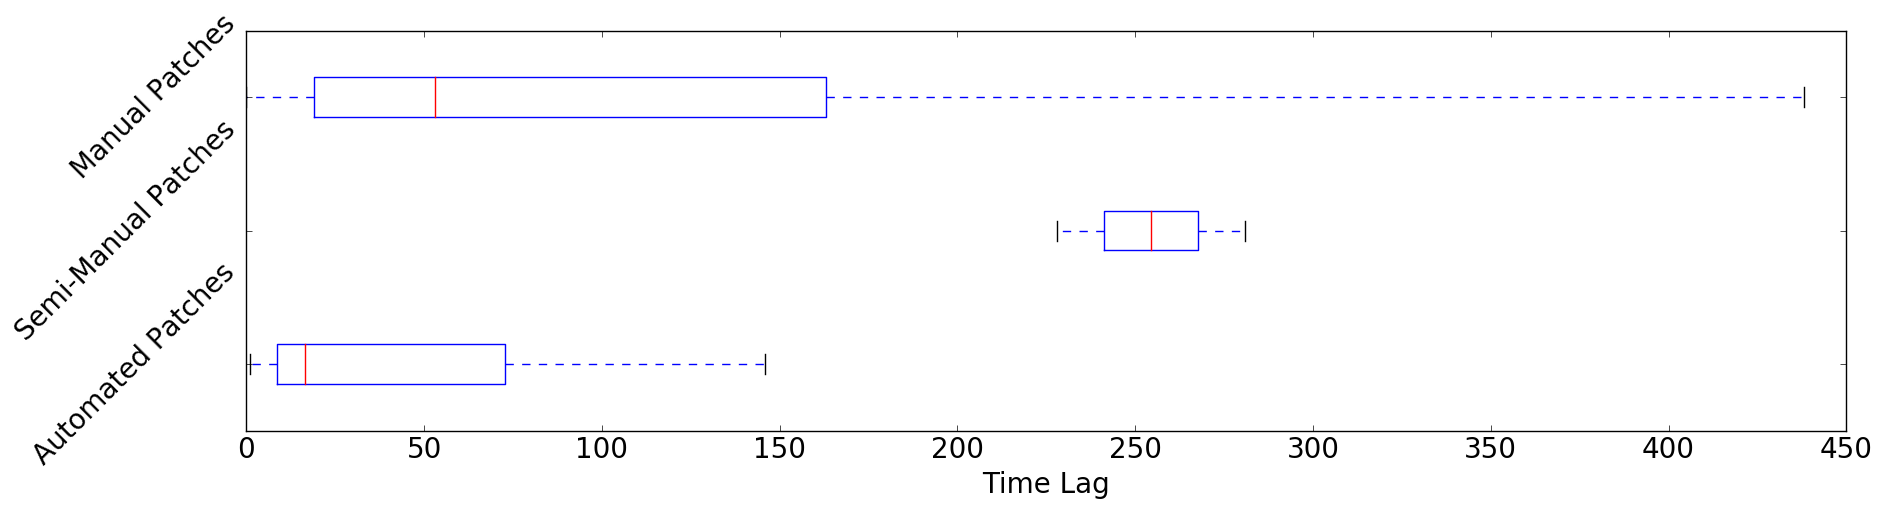

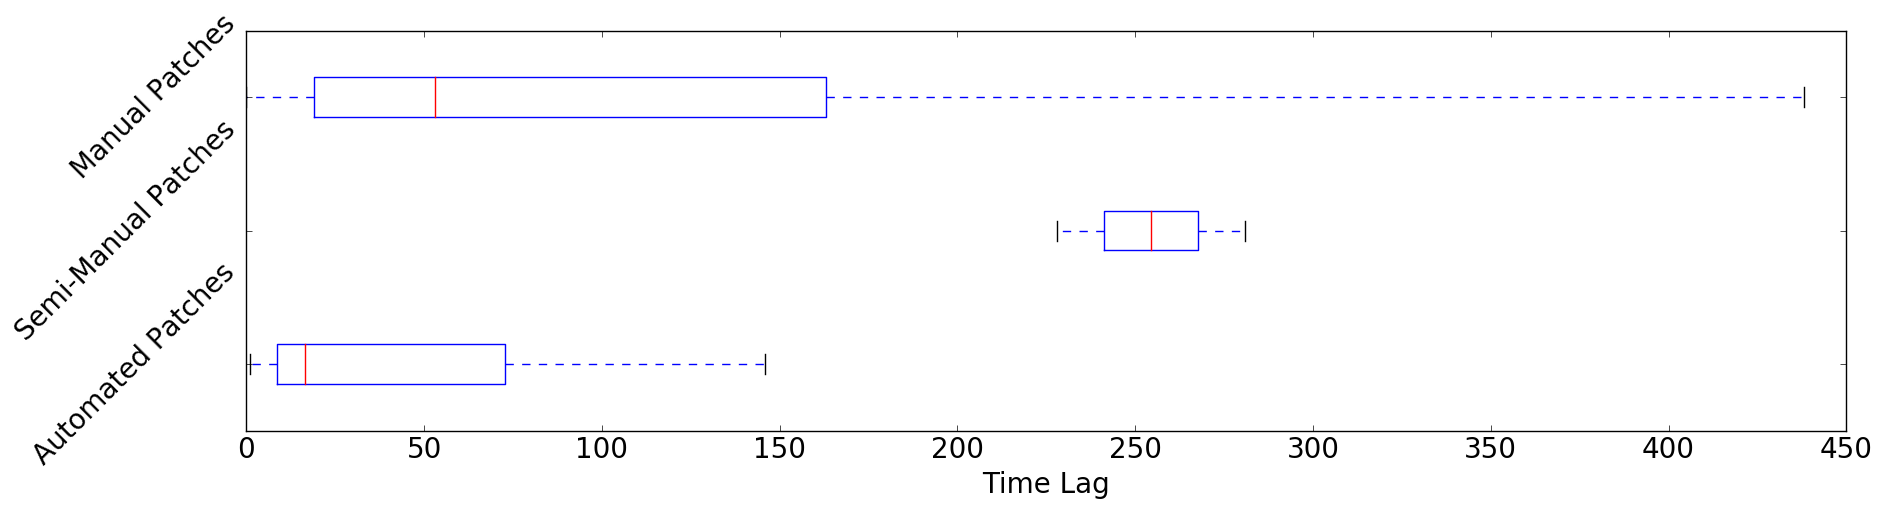

In [39]:
plotTimeLag(t1.timeLag.values,t2.timeLag.values,t3.timeLag.values,False)

In [406]:
merged.to_csv('revertedCommits-data')

In [1]:
def plotTimeLag(y1, y2,y3, outlier = True):

    y = [y1,y2,y3]
    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #print y
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    if outlier == True:
        ax1.boxplot(y, 0, 'rs', 0, 2)
    else:
        ax1.boxplot(y, 0, '', 0, 2)

    
    #ax1.grid(True)#, color='g' , linestyle ='-')

    varLabels = ['Automated Patches', 'Semi-Manual Patches', 'Manual Patches']
    
    ax1.set_yticklabels(varLabels, rotation=45)
    
    #if outlier == True:
    #    ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
    #    ax1.set_xticks(np.arange(-200,700,5))
    
    plt.xlabel('Time Lag',fontsize=20)
    #plt.ylabel('Types',fontsize=20)
    #plt.title("Speciality of all developers",fontsize=20)
    plt.tick_params(labelsize=20)

    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    plt.subplots_adjust(left=0.18,bottom=0.15,right=0.98, top=0.95 , wspace= 0.1, hspace=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(20,5, forward=True)
    #ax1.set_xscale('log')
    #os.chdir(HOME)
    
    if outlier == True:
        plt.savefig("TimeLagOfReverts.pdf",dpi=100)
    else:
        plt.savefig("TimeLagOfRevertsWithOutliers.pdf",dpi=100)
CWD = os.getcwd()
print CWD


NameError: name 'os' is not defined

In [34]:
def getTargetCommitType(sha):
    t1 = c1.commit.values.tolist()
    t2 = c2.commit.values.tolist()
    t3 = c3.commit.values.tolist()
    if sha in t1:
        return 'H'
    elif sha in t2:
        return 'DLH'
    elif sha in t3:
        return 'HMG'


In [13]:
def controlTypes(shas):
    c1Match = str()
    c2Match = str()
    c3Match = str()
    for sha in shas:
        inc1 = c1[c1.commit == sha]
        inc2 = c2[c2.commit == sha]
        inc3 = c3[c3.commit == sha]
        if len(inc1) > 0 :
            c1Match = (inc1.commit)
        if len(inc2) > 0 :
            c2Match = (inc2.commit)
        if len(inc3) > 0 :
            c3Match = (inc3.commit)
            
        if len(inc1) > 1 :
            print 'HATA'
        if len(inc2) > 1 :
            print 'HATA'
        if len(inc3) > 1 :
            print 'HATA'
    return [c1Match,c2Match,c3Match]